In [161]:
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import scipy
from scipy.stats import kstest
from scipy.stats import ks_2samp
import matplotlib
import seaborn as sns 
from scipy.stats import powerlaw
%matplotlib inline

In [ ]:
# try to load json
# with open('yelp_academic_dataset_user.json') as f:  #open before load
#     line = f.readline()
#     d = json.loads(line)
#     print(type(d))
#     f.close()    
# 问题在于每行的数值没有保存下来

# 读取数据

In [2]:
# Read json file and make it data frame
data_user = pd.read_json('yelp_academic_dataset_user.json', lines=True)
data_business = pd.read_json('yelp_academic_dataset_business.json', lines=True)
data_checkin = pd.read_json('yelp_academic_dataset_checkin.json', lines=True)
data_tip = pd.read_json('yelp_academic_dataset_tip.json', lines=True)
# data_review = pd.read_json('yelp_academic_dataset_review.json', lines=True)  error

# 查看数据

In [530]:
data_business.shape

(85901, 15)

# 选择所需的列

In [7]:
# For individual question 1 extract business_id, categories, city, stars from business dataset.
data_business_sub = pd.concat([data_business['business_id'], data_business['categories'], data_business['city'], \
                               data_business['stars'], data_business['state'] ], axis = 1) 

In [6]:
data_business_sub.head()

,business_id,categories,city,stars,state
0,5UmKMjUEUNdYWqANhGckJw,"[Fast Food, Restaurants]",Dravosburg,3.5,PA
1,UsFtqoBl7naz8AVUBZMjQQ,[Nightlife],Dravosburg,3.0,PA
2,cE27W9VPgO88Qxe4ol6y_g,"[Active Life, Mini Golf, Golf]",Bethel Park,2.5,PA
3,mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",Braddock,4.5,PA
4,mYSpR_SLPgUVymYOvTQd_Q,"[Active Life, Golf]",Braddock,5.0,PA


# 选择fast food 类的数据

In [9]:
# Extract rows whose category = Fast food
data_business_sub_fast = data_business_sub.loc[data_business_sub['categories'].astype(str).str.contains('Fast Food')]

In [123]:
#just try to calculate the frequency of different categories
categories_str = data_business_sub['categories'].astype(str)
categories_str.value_counts()

['Mexican', 'Restaurants']                                                                                 1680
['Pizza', 'Restaurants']                                                                                   1298
['Food', 'Coffee & Tea']                                                                                   1206
['Beauty & Spas', 'Nail Salons']                                                                           1183
['Hair Salons', 'Beauty & Spas']                                                                           1127
['Hotels & Travel', 'Event Planning & Services', 'Hotels']                                                 1114
['Chinese', 'Restaurants']                                                                                  943
['Home Services', 'Real Estate', 'Apartments']                                                              848
['Auto Repair', 'Automotive']                                                                           

In [16]:
data_business_sub_fast

,business_id,categories,city,stars,state
0,5UmKMjUEUNdYWqANhGckJw,"[Fast Food, Restaurants]",Dravosburg,3.5,PA
34,PK6aSizckHFWk8i0oxt5DA,"[Burgers, Fast Food, Restaurants]",Homestead,2.0,PA
40,6ilJq_05xRgek_8qUp36-g,"[Burgers, Fast Food, Restaurants]",Munhall,2.0,PA
48,W7ysp8GLCBrs0GXIVwAcBQ,"[Burgers, Fast Food, Restaurants]",Homestead,3.0,PA
84,CL3tZqbYT7B5zgewKCS6-Q,"[Burgers, Fast Food, Restaurants]",West Mifflin,1.5,PA
106,_jsJFrAmFVPRio0eEVExbA,"[Burgers, Fast Food, Restaurants]",Pittsburgh,2.5,PA
110,JX2gDf2uy2UGuKPpcKT-IA,"[Burgers, Fast Food, Restaurants]",Pittsburgh,1.5,PA
155,bZcqORBnVApUA2-SEn7VEQ,"[Burgers, Fast Food, Restaurants]",Pittsburgh,2.0,PA
219,BbIh5NTizhV4Fq_mLmNkpg,"[Seafood, Fast Food, Restaurants]",Pittsburgh,1.5,PA
221,xMZM_vyCraM9BZUn4yrj5Q,"[Fast Food, Chicken Wings, Restaurants]",Pittsburgh,3.5,PA


In [17]:
data_business_sub_fast['state'].value_counts()

AZ     1385
NV      881
NC      310
EDH     165
QC      117
PA       91
WI       88
BW       34
IL       31
ON       24
SC       18
MLN       6
FIF       1
AK        1
NW        1
          1
Name: state, dtype: int64

# 选择NC，AZ，NV

In [50]:
data_business_sub_fast_3 = data_business_sub_fast.loc[data_business_sub_fast['state'].astype(str).isin(['NC', 'AZ', 'NV'])]

In [263]:
#export to csv
data_business_sub_fast_3.to_csv('data_business_sub_fast_3', sep='\t', encoding='utf-8')

In [51]:
data_business_sub_fast_3.sort_values(by = ['stars'], ascending = False).head()

,business_id,categories,city,stars,state
85084,YDk4WsZJYNbkfBQYJS5zGw,"[Cheesesteaks, Fast Food, Chicken Wings, Resta...",Montgomery,5.0,NC
55978,aDnmvP-GgTD9KECw8ayR-Q,"[Burgers, Fast Food, Restaurants]",Phoenix,5.0,AZ
84785,wHM0pW7QAIRt8kA1_P07-Q,"[Hot Dogs, Fast Food, Restaurants]",Glendale,5.0,AZ
66266,b93qjvQLDI8wUcQsqpINjg,"[Fast Food, Restaurants]",Avondale,5.0,AZ
85647,2aq8b0Rpp60NUr4F6r_Mrw,"[Burgers, Fast Food, Restaurants]",Buckeye,5.0,AZ


In [53]:
#produce 3 datasets of each state
data_business_NC = data_business_sub_fast.loc[data_business_sub_fast['state'].astype(str) == 'NC']
data_business_AZ = data_business_sub_fast.loc[data_business_sub_fast['state'].astype(str) == 'AZ']
data_business_NV = data_business_sub_fast.loc[data_business_sub_fast['state'].astype(str) == 'NV']

# 计算标准统计量：均值，标准差，偏度，峰度，众数，分位数

In [81]:
#################################################
#mean std skew kurtosis

#NC 
NC_mean = np.mean(data_business_NC['stars']) #2.920967741935484
NC_std = np.std(data_business_NC['stars']) # 0.9329345129273707
NC_star = data_business_NC['stars'] #nums: 310
NC_skew = stats.skew(NC_star)  #-0.17777798027115244
NC_kurtosis = stats.kurtosis(NC_star)  #0.8435376264647032
NC_mode = stats.mode(NC_star)[0][0] #3.5

#AZ 
AZ_mean = np.mean(data_business_AZ['stars'])  #2.8606498194945846
AZ_std = np.std(data_business_AZ['stars']) #0.8399352799385957
AZ_star = data_business_AZ['stars'] #1385
AZ_skew = stats.skew(AZ_star) #0.054193889834117014
AZ_kurtosis = stats.kurtosis(AZ_star) #-0.6877483901889594
AZ_mode = stats.mode(AZ_star)[0][0] #2.5

#NV 
NV_mean = np.mean(data_business_NV['stars']) #2.8450624290578888
NV_std = np.std(data_business_NV['stars']) #0.8008940956929197
NV_star = data_business_NV['stars'] #881
NV_skew = stats.skew(NV_star) #-0.03133567444289323
NV_kurtosis = stats.kurtosis(NV_star) #-0.5863843468787482
NV_mode = stats.mode(NV_star)[0][0] #2.5

In [535]:
NC_star.describe()

count    310.000000
mean       2.920968
std        0.934443
min        1.000000
25%        2.000000
50%        3.000000
75%        3.500000
max        5.000000
Name: stars, dtype: float64

# Test whether two samples are from the same distribution using KS test

In [536]:
AZ_star.describe()


count    1385.000000
mean        2.860650
std         0.840239
min         1.000000
25%         2.000000
50%         3.000000
75%         3.500000
max         5.000000
Name: stars, dtype: float64

In [537]:
NV_star.describe()

count    881.000000
mean       2.845062
std        0.801349
min        1.000000
25%        2.500000
50%        3.000000
75%        3.500000
max        5.000000
Name: stars, dtype: float64

In [152]:
# #compute KS
# data_business_NC.shape #310
# data_business_AZ.shape #1385
# data_business_NV #881
KS_NC_to_AZ = ks_2samp(data_business_NC['stars'], data_business_AZ['stars']) 
KS_AZ_to_NC = ks_2samp(data_business_NC['stars'], data_business_AZ['stars']) 
KS_NC_to_NV = ks_2samp(data_business_NC['stars'], data_business_NV['stars']) 
KS_AZ_to_NV = ks_2samp(data_business_AZ['stars'], data_business_NV['stars']) 

In [148]:
KS_NC_to_AZ
#Ks_2sampResult(statistic=0.06676371258879699, pvalue=0.20145585614463216)
KS_AZ_to_NC
#Ks_2sampResult(statistic=0.06676371258879699, pvalue=0.20145585614463216)
KS_NC_to_NV
#Ks_2sampResult(statistic=0.08183149646662513, pvalue=0.08804602985544747)
KS_AZ_to_NV
#Ks_2sampResult(statistic=0.026759876576093022, pvalue=0.8305627612593279)

Ks_2sampResult(statistic=0.06676371258879699, pvalue=0.20145585614463216)

# Test whether these samples are from normal distribution

In [155]:
KS_NC = kstest(data_business_NC['stars'],'norm')
KS_AZ = kstest(data_business_AZ['stars'],'norm')
KS_NV = kstest(data_business_NV['stars'],'norm')

KS_NC
#KstestResult(statistic=0.8977089277633999, pvalue=0.0)
KS_AZ
#KstestResult(statistic=0.920918430500095, pvalue=0.0)
KS_NV
#KstestResult(statistic=0.9150316182544109, pvalue=0.0)

# Plot 

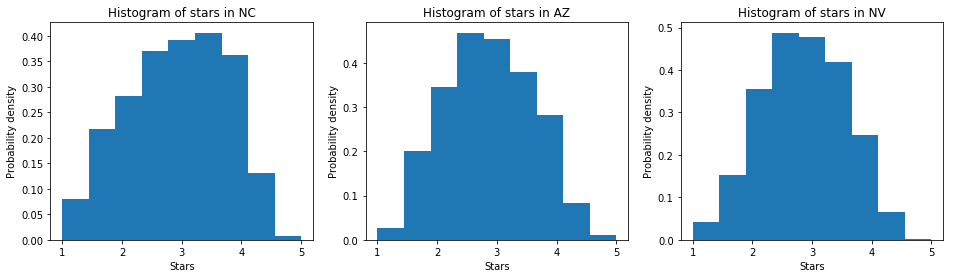

In [460]:
#plot ratings of 3 states
num_bins = 9

####################################################################

fig = plt.figure(figsize=plt.figaspect(0.25))
#the histogram of the NC data
ax = fig.add_subplot(1, 3, 1)
n_NC, bins, patches = ax.hist(NC_star, bins = num_bins, density = 1) # density = 1

#add a best fit line
# y = ((1 / np.sqrt(2 * np.pi) * NC_std)) * np.exp(-0.5 * (1/NC_std * (bins - NC_mean)) **2)

# ax.plot(bins, y)
ax.set_xlabel('Stars')
ax.set_ylabel('Probability density')
ax.set_title('Histogram of stars in NC')
####################################################################
#the histogram of the AZ data
ax = fig.add_subplot(1, 3, 2)
n_AZ, bins, patches = ax.hist(AZ_star, bins = num_bins,  density = 1) #, density = 1

# ax.plot(bins, y)
ax.set_xlabel('Stars')
ax.set_ylabel('Probability density')
ax.set_title('Histogram of stars in AZ')

####################################################################
#the histogram of the NV data
ax = fig.add_subplot(1, 3, 3)
n_NV, bins, patches = ax.hist(NV_star, bins = num_bins, density = 1) #, density = 1

# ax.plot(bins, y)
ax.set_xlabel('Stars')
ax.set_ylabel('Probability density')
ax.set_title('Histogram of stars in NV')

plt.show()

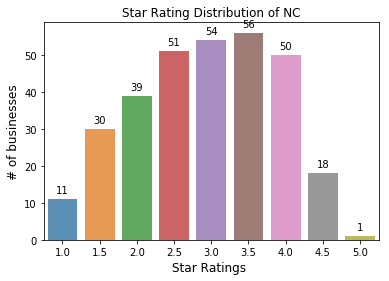

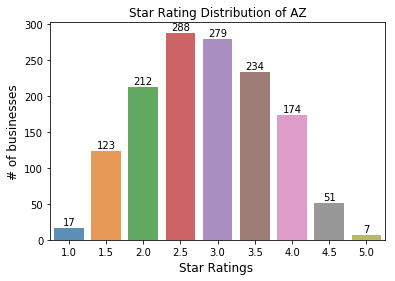

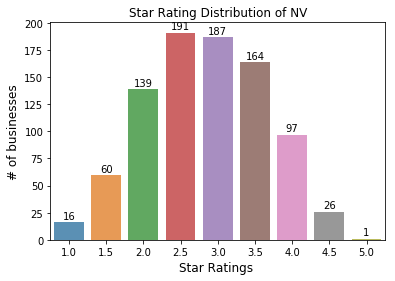

In [534]:
#Get the distribution of the ratings

####################################################################
#NC
NC_x=NC_star.value_counts()
NC_x=NC_x.sort_index()
#plot

ax = fig.add_subplot(1, 3, 1)

ax= sns.barplot(NC_x.index, NC_x.values, alpha=0.8)
plt.title("Star Rating Distribution of NC")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = NC_x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 1, label, ha='center', va='bottom')

plt.show()

####################################################################
#AZ
AZ_x=AZ_star.value_counts()
AZ_x=AZ_x.sort_index()
#plot
ax = fig.add_subplot(1, 3, 2)

ax= sns.barplot(AZ_x.index, AZ_x.values, alpha=0.8)
plt.title("Star Rating Distribution of AZ")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = AZ_x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 1, label, ha='center', va='bottom')

plt.show()
####################################################################
#NV
NV_x=NV_star.value_counts()
NV_x=NV_x.sort_index()
#plot
ax = fig.add_subplot(1, 3, 3)

ax= sns.barplot(NV_x.index, NV_x.values, alpha=0.8)
plt.title("Star Rating Distribution of NV")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = NV_x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 1, label, ha='center', va='bottom')

plt.show()

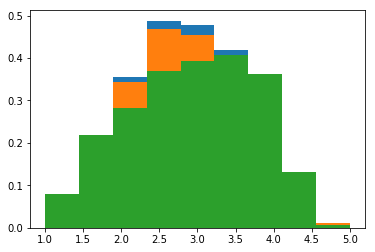

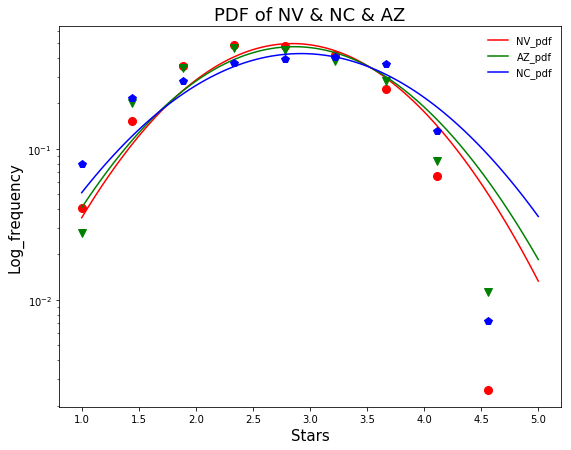

In [515]:
#PDF
#NV
x_pdf_NV = np.linspace(min(NV_star), max(NV_star), 100) #point grid between min and max return
g_pdf_NV = np.exp(-(x_pdf - NV_mean)**2 / (2 * NV_std ** 2)) / np.sqrt(2* np.pi *NV_std ** 2)
NV_bins = 9

b_NV, a_NV, ptch_NV = plt.hist(NV_star, NV_bins, normed= True) # normalized histogram of returns with NV_bins

#AZ
x_pdf_AZ = np.linspace(min(AZ_star), max(AZ_star), 100) #point grid between min and max return
g_pdf_AZ = np.exp(-(x_pdf - AZ_mean)**2 / (2 *AZ_std ** 2)) / np.sqrt(2* np.pi *AZ_std ** 2)
AZ_bins = 9

b_AZ, a_AZ, ptch_AZ = plt.hist(AZ_star, AZ_bins, normed= True) # normalized histogram of returns with AZ_bins

#NC
x_pdf_NC = np.linspace(min(NC_star), max(NC_star), 100) #point grid between min and max return
g_pdf_NC = np.exp(-(x_pdf - NC_mean)**2 / (2 * NC_std ** 2)) / np.sqrt(2* np.pi *NC_std ** 2)
NC_bins = 9

b_NC, a_NC, ptch_NC = plt.hist(NC_star, NC_bins, normed= True) # normalized histogram of returns with NC_bins

###############################################################
fig,ax = plt.subplots(figsize=(9,7))

ax.semilogy(a_NV[:-1], b_NV, marker='o',linewidth=0, markersize=8,color = 'r')
ax.semilogy(x_pdf_NV, g_pdf_NV, label = "NV_pdf", color = 'r' ) 

ax.semilogy(a_AZ[:-1], b_AZ, marker='v',linewidth=0, markersize=8,color = 'g')
ax.semilogy(x_pdf_AZ, g_pdf_AZ, label = "AZ_pdf", color= 'g' ) #

ax.semilogy(a_NC[:-1], b_NC, marker='p',linewidth=0, markersize=8,color = 'b')
ax.semilogy(x_pdf_NC, g_pdf_NC, label = "NC_pdf", color= 'b' ) #

ax.set_title("PDF of NV & NC & AZ", fontsize=18)
ax.set_xlabel('Stars', fontsize = 15)
ax.set_ylabel('Log_frequency', fontsize = 15)
ax.legend(loc='best', frameon=False)
plt.show()


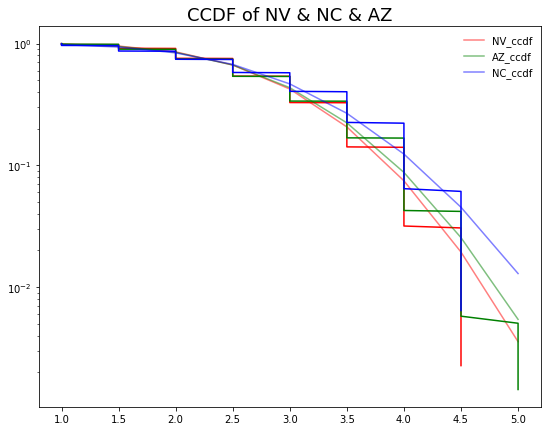

In [511]:
#CCDF
#NV
x_ccdf_NV = np.sort(NV_star) #Returns sorted in ascending order
y_ccdf_NV = np.arange(1,len(NV_star),1) 
y_ccdf_NV = 1-y_ccdf_NV/(len(NV_star)+1) #calculate CCDF

NV_ccdf = 0.5*(1-scipy.special.erf((x_ccdf_NV - NV_mean) / (NV_std * np.sqrt(2)))) # gaussian ccdf


#AZ
x_ccdf_AZ = np.sort(AZ_star) #Returns sorted in ascending order
y_ccdf_AZ = np.arange(1, len(AZ_star), 1)
y_ccdf_AZ = 1-y_ccdf_AZ/(len(AZ_star)+1) #calculate CCDF

AZ_ccdf = 0.5*(1-scipy.special.erf((x_ccdf_AZ - AZ_mean) / (AZ_std * np.sqrt(2)))) # gaussian ccdf

#NC
x_ccdf_NC = np.sort(NC_star) #Returns sorted in ascending order
y_ccdf_NC = np.arange(1, len(NC_star), 1)
y_ccdf_NC = 1-y_ccdf_NC/(len(NC_star)+1) #calculate CCDF

NC_ccdf = 0.5*(1-scipy.special.erf((x_ccdf_NC - NC_mean) / (NC_std * np.sqrt(2)))) # gaussian ccdf

###############################################################
fig,ax = plt.subplots(figsize=(9,7))

ax.semilogy(x_ccdf_NV[:-1], y_ccdf_NV, color = 'r')
ax.semilogy(x_ccdf_NV, NV_ccdf, label = "NV_ccdf", color = 'r', alpha = 0.5) 

ax.semilogy(x_ccdf_AZ[:-1],y_ccdf_AZ,  markersize=2,color = 'g')
ax.semilogy(x_ccdf_AZ, AZ_ccdf, label = "AZ_ccdf", color= 'g', alpha = 0.5 ) #

ax.semilogy(x_ccdf_NC[:-1], y_ccdf_NC,markersize=2,color = 'b')
ax.semilogy(x_ccdf_NC, NC_ccdf, label = "NC_ccdf", color= 'b', alpha = 0.5 ) #

ax.set_title("CCDF of NV & NC & AZ", fontsize=18)
ax.legend(loc='best', frameon=False)
plt.show()



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  from ipykernel import kernelapp as app


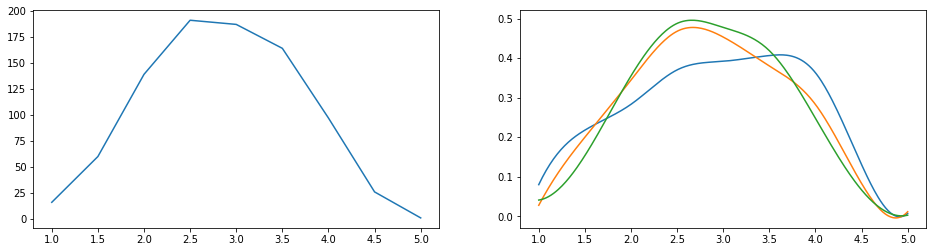

In [255]:
## Make curve using 'n', which is the frequency of each stars.
xx = np.arange(1,5.5,0.5)
yy = n

fig = plt.figure(figsize=plt.figaspect(0.25))
ax = fig.add_subplot(1, 2, 1)

ax.plot(xx,yy)

ax = fig.add_subplot(1,2,2)
xnew = np.linspace(xx.min(),xx.max(),300) #300 represents number of points to make between xx.min and xx.max
a_1 = scipy.interpolate.spline(xx,n_NC,xnew)
a_2 = scipy.interpolate.spline(xx,n_AZ,xnew)
a_3 = scipy.interpolate.spline(xx,n_NV,xnew)
ax.plot(xnew,a_1)
ax.plot(xnew,a_2)
ax.plot(xnew,a_3)
plt.show()

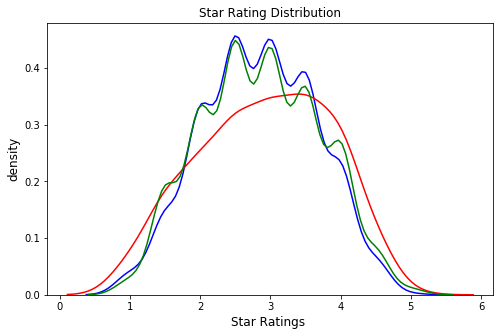

In [232]:
#Kernel
plt.figure(figsize=(8,5))

aaa = sns.distplot(NV_star,  kde_kws={"color": 'b'}, hist = False)
bbb = sns.distplot(NC_star,  kde_kws={"color": 'r'}, hist = False)
ccc = sns.distplot(AZ_star,  kde_kws={"color": 'g'}, hist = False)

plt.title("Star Rating Distribution")
plt.ylabel('density', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

plt.show()

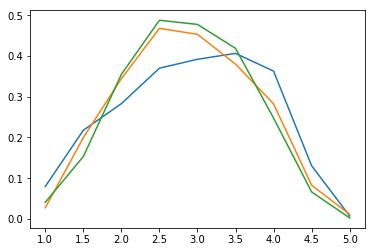

In [254]:
plt.plot(xx, n_NC)
plt.plot(xx, n_AZ)
plt.plot(xx, n_NV)

In [ ]:
# calculate cdf 
# sns.distplot(NV_star, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

#  Choose NV area and extract business_id and user_id

In [88]:
##read NV business dataset

js = open('yelp_academic_dataset_business.json', 'r')

NV_business_id = []
for line in js.readlines():
    business = json.loads(line)
    if business['state'] == 'NV':
        NV_business_id.append(business['business_id'])
        

In [89]:
#read NV review dataset

file = open('yelp_academic_dataset_review.json', 'r')

NV_user_id = []
for line in file.readlines():
    review = json.loads(line)
    if review['business_id'] in NV_business_id:
        NV_user_id.append(review['user_id'])
        

In [90]:
#turn dictionary into dataframe
NV_business_id_df = pd.DataFrame(NV_business_id)
NV_user_id_df = pd.DataFrame(NV_user_id)

# Merge two dataset using primary key business_id so that i could focus on just one area and count the number of the reviews of each individual and business

In [101]:

js = open('yelp_academic_dataset_business.json', 'r')

NV_business = []
for line in js.readlines():
    buss = json.loads(line)
    if buss['state'] == 'NV':
        NV_business.append(buss)

In [105]:
file = open('yelp_academic_dataset_review.json', 'r')

NV_user = []
for line in file.readlines():
    revw = json.loads(line)
    if revw['business_id'] in NV_business_id:
        NV_user.append(revw)

In [106]:
NV_business_df = pd.DataFrame(NV_business)
NV_user_df = pd.DataFrame(NV_user)

In [108]:
# review data!!
NV_user_df.head()

,business_id,date,review_id,stars,text,type,user_id,votes
0,JiA2Q-APw1hBiLBKZv3LKA,2015-01-12,5Y-S4TduFaFGQQ2FMXAT7g,4,A Scenic Ranch with a lake in the middle of th...,review,STvYDq8LmYRdwMHHQbfkjw,"{'funny': 0, 'useful': 0, 'cool': 0}"
1,JiA2Q-APw1hBiLBKZv3LKA,2015-07-21,Fr7F0ynWCMvfiN3k0Jcs3A,5,"Can't wait to go again! Beautiful trails,lands...",review,A7MsKtsoM-IEe0We3cdQ6Q,"{'funny': 0, 'useful': 0, 'cool': 0}"
2,JiA2Q-APw1hBiLBKZv3LKA,2016-05-23,WnbXLER-mysQIrM0k1I0dA,5,A little hidden gem in the desert. Right next ...,review,uFjo2KVq3BlBRqoo9se-ZQ,"{'funny': 19, 'useful': 36, 'cool': 37}"
3,IjcKyB-LUnev2iapzyJ11w,2007-04-07,Ng4jFiLGn_yXoHDeni6lVA,4,This is a nicely remodeled Smith's. You can f...,review,VkF_8jQdiSB_XjaFgekIqg,"{'funny': 0, 'useful': 0, 'cool': 0}"
4,IjcKyB-LUnev2iapzyJ11w,2007-11-27,RCcyc-6KrjMMjD2LCDAqYg,3,Remodeled? In April? Not really. They JUST ...,review,qp0qEFwVAH0DS5N4o_rVjg,"{'funny': 0, 'useful': 0, 'cool': 1}"


In [439]:
NV_business_df

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,{},JiA2Q-APw1hBiLBKZv3LKA,[],Blue Diamond,"8000 Blue Diamond Rd\nSouthwest\nBlue Diamond,...",{},36.020636,-115.299037,Spring Mountain Ranch,[Southwest],True,3,4.5,NV,business
1,"{'Parking': {'garage': False, 'street': False,...",IjcKyB-LUnev2iapzyJ11w,"[Food, Grocery, Shopping, Drugstores]",Henderson,"1000 N Green Valley Pkwy\nHenderson, NV 89012",{},36.027902,-115.084131,Smith's Food & Drug Stores,[],True,10,3.5,NV,business
2,"{'Take-out': True, 'Wi-Fi': 'free', 'Drive-Thr...",Y3jVDgLRULH52M4_fXQOug,"[Burgers, Fast Food, Restaurants]",Henderson,"65 S Valle Verde Dr\nHenderson, NV 89012",{},36.025017,-115.063136,McDonald's,[],True,3,2.0,NV,business
3,"{'Good for Kids': True, 'Parking': {'garage': ...",SP5yg5966RD-1qcgYmDGdg,"[Active Life, Golf]",Henderson,"2020 W Horizon Ridge Pkwy\nHenderson, NV 89012","{'Monday': {'close': '18:00', 'open': '06:00'}...",36.006516,-115.076652,Desert Willow Golf Course,[],True,72,4.0,NV,business
4,"{'By Appointment Only': False, 'Accepts Credit...",fItrFDQAb2Kz7wpnNz3XKA,"[Home Services, Real Estate, Apartments]",Henderson,"595 S Green Valley Pkwy\nAnthem\nHenderson, NV...","{'Monday': {'close': '18:00', 'open': '08:00'}...",36.007013,-115.085437,Horizon Ridge Apartments,[Anthem],True,32,2.5,NV,business
5,"{'By Appointment Only': False, 'Accepts Credit...",l75H5-bJ3eTiNirRwNKJyQ,"[Tanning, Beauty & Spas]",Henderson,1450 W Horizon Ridge Pkwy\nSte A-501\nHenderso...,"{'Monday': {'close': '21:00', 'open': '09:00'}...",36.023229,-115.048328,Radiance Tanning Salon,[],True,4,4.5,NV,business
6,"{'Parking': {'garage': False, 'street': False,...",gfamsLvfcxwJ8cS1i7WCJg,"[Food, Grocery]",Henderson,"201 S Stephanie St\nHenderson, NV 89012","{'Monday': {'close': '00:00', 'open': '06:00'}...",36.020337,-115.049121,Albertsons,[],True,8,2.5,NV,business
7,"{'Parking': {'garage': False, 'street': False,...",EC1kiRed8UwOGX6Ftqc9Tg,"[Food, Convenience Stores]",Henderson,"1400 W Horizon Ridge Pkwy\nHenderson, NV 89012","{'Monday': {'close': '00:00', 'open': '00:00'}...",36.022150,-115.047971,7-Eleven,[],True,23,3.5,NV,business
8,{},amxk6524qEpwyf6kGyr8xA,[Event Planning & Services],Henderson,"2020 W Horizon Ridge Pkwy\nHenderson, NV 89012",{},36.006516,-115.076652,Sun City McDonald Ranch Community Association,[],True,5,3.0,NV,business
9,"{'By Appointment Only': True, 'Accepts Insuran...",F7l0UuTvf_734UMAwsJfkg,"[Doctors, Medical Centers, Health & Medical, F...",Las Vegas,"1701 Bearden Dr\nDowntown\nLas Vegas, NV 89106",{},36.161517,-115.164011,Apex Medical Center,[Downtown],True,126,3.0,NV,business


In [532]:
NV_user_df.shape

(1154799, 8)

In [111]:
# Merge review and business
NV_merge = pd.merge(NV_user_df, NV_business_df, on ='business_id')
# NV_merge.shape (1154799,22)
# NV_user_df.shape(1154799, 8)
# NV_business_df.shape(23591, 15)

In [264]:
#export NV_merge
# NV_merge.to_csv('NV_merge', sep='\t', encoding='utf-8')

In [119]:
NV_merge.head()

,business_id,date,review_id,stars_x,text,type_x,user_id,votes,attributes,categories,...,hours,latitude,longitude,name,neighborhoods,open,review_count,stars_y,state,type_y
0,JiA2Q-APw1hBiLBKZv3LKA,2015-01-12,5Y-S4TduFaFGQQ2FMXAT7g,4,A Scenic Ranch with a lake in the middle of th...,review,STvYDq8LmYRdwMHHQbfkjw,"{'funny': 0, 'useful': 0, 'cool': 0}",{},[],...,{},36.020636,-115.299037,Spring Mountain Ranch,[Southwest],True,3,4.5,NV,business
1,JiA2Q-APw1hBiLBKZv3LKA,2015-07-21,Fr7F0ynWCMvfiN3k0Jcs3A,5,"Can't wait to go again! Beautiful trails,lands...",review,A7MsKtsoM-IEe0We3cdQ6Q,"{'funny': 0, 'useful': 0, 'cool': 0}",{},[],...,{},36.020636,-115.299037,Spring Mountain Ranch,[Southwest],True,3,4.5,NV,business
2,JiA2Q-APw1hBiLBKZv3LKA,2016-05-23,WnbXLER-mysQIrM0k1I0dA,5,A little hidden gem in the desert. Right next ...,review,uFjo2KVq3BlBRqoo9se-ZQ,"{'funny': 19, 'useful': 36, 'cool': 37}",{},[],...,{},36.020636,-115.299037,Spring Mountain Ranch,[Southwest],True,3,4.5,NV,business
3,IjcKyB-LUnev2iapzyJ11w,2007-04-07,Ng4jFiLGn_yXoHDeni6lVA,4,This is a nicely remodeled Smith's. You can f...,review,VkF_8jQdiSB_XjaFgekIqg,"{'funny': 0, 'useful': 0, 'cool': 0}","{'Parking': {'garage': False, 'street': False,...","[Food, Grocery, Shopping, Drugstores]",...,{},36.027902,-115.084131,Smith's Food & Drug Stores,[],True,28,3.5,NV,business
4,IjcKyB-LUnev2iapzyJ11w,2007-11-27,RCcyc-6KrjMMjD2LCDAqYg,3,Remodeled? In April? Not really. They JUST ...,review,qp0qEFwVAH0DS5N4o_rVjg,"{'funny': 0, 'useful': 0, 'cool': 1}","{'Parking': {'garage': False, 'street': False,...","[Food, Grocery, Shopping, Drugstores]",...,{},36.027902,-115.084131,Smith's Food & Drug Stores,[],True,28,3.5,NV,business


In [297]:
NV_userid = NV_merge['user_id'].value_counts()

In [121]:
# NV_merge_2 = pd.merge(NV_merge, data_user, on = 'user_id')
# NV_merge_2.head() #32 columns

# #drop duplicate user_id: every user_id shows one time
# NV_merge_2_uni = NV_merge_2.drop_duplicates('user_id')
# max(NV_merge_2_uni['review_count_y']) #10897
# # NV_merge_2_uni.to_csv('NV_merge_2_uni', sep='\t', encoding='utf-8')

# # NV_merge_2_uni.shape #(333965, 32)
# # NV_merge_2.shape  #(1154799,32)
# # data_user.shape #(686556, 11)

In [310]:
NV_userid.shape

(333965,)

In [323]:
NV_userid

9A2-wSoBUxlMd3LwmlGrrQ    1558
Iu3Jo9ROp2IWC9FwtWOaUQ    1469
glRXVWWD6x1EZKfjJawTOg    1124
ia1nTRAQEaFWv0cwADeK7g    1124
PV5voYSD43Cn_3gHmxG7DA     935
5lq4LkrviYgQ4LJNsBYHcA     757
OAd-vbR_POac1zHtu-Y2Zg     752
XjfKBr96h6GgrfkR_q6gIA     731
kGgAARL2UmvCcTRfiscjug     725
38JK-SfO9NkAGs1RwlH2Gw     692
EjhVxYFeMUYimoImjMduzQ     655
k5p3YP1ZjCa8ZS3xqXgBug     652
y05bv65OCTcZgB0GhO8_sA     624
OaFcpi3W4AwxrD8W2pgC_A     623
WmAyExqSWoiYZ5XEqpk_Uw     617
rzHZ3iYVQe_8h2e42DbUsw     552
i8KMQX7nekLSCzb_DVb6yA     546
LusAw6vTDC7KAfbuClMReA     546
Qx9MnE4R-g70HyF468O8dA     536
4p-qAdc_ZLXfieNwaZGNGA     506
Mx-vxv_V-SQCe76w4RmUfA     504
ifFTbGgwjXALO1PgMHzrTQ     501
oOayyTrVO-PbVeXXsh_JEQ     487
Yw-Q_4QrwWffjnHWLvo4kw     486
pzmzWFoVIKpuYYG_b9bgJQ     478
2HmHgW3hRYvXYFmQyQtLuw     472
zTWH9b_ItSdLOK9ypeFOIw     466
qqtmFGhyyHc37coT4qJxaw     466
8l351svY2y1yX5LFm8H3vQ     463
17LPTsu4RgqTZ3SxsGzzxw     456
                          ... 
1-jWwtN3Q0EPSOnXtMn8xA       1
VAQzFVB-

Right tail exponent:1.855


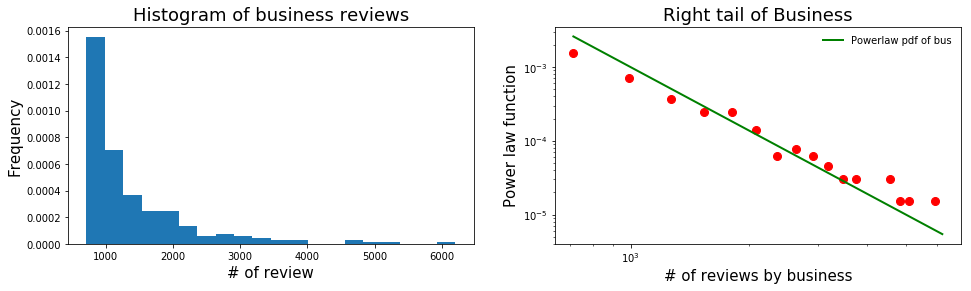

Mean of bootstrap:1.868
Right tail interval at 0.90 CL: [1.782, 1.956]


In [528]:
##### BUSINESS 

p = 0.01 #Defining tails as top p% of returns (both positive and negative)
bts = 0.8 # Fraction of data to be ratined in each bootsrap sample
Nbts = 1500 # Number of bootstrap samples
alpha = 0.9 # Significance level

NV_business_df['review_count'] =np.sort(NV_business_df['review_count'])
bus_tail = NV_business_df['review_count'] [int(np.round((1-p)*len(NV_business_df['review_count'])))-1:] #Selecting top p% of returns
N = len(bus_tail) #Number of returns selected as right tail
alpha_bus = N/sum(np.log(bus_tail/min(bus_tail))) #Maximum-Likelihood estimate for right tail exponent

print("Right tail exponent:{:.3f}".format(alpha_bus))

x_tail_bus = np.linspace(min(bus_tail), max(bus_tail), num=100)
y_tail_bus = alpha_bus*(x_tail_bus/min(bus_tail))**(-alpha_bus-1)/min(bus_tail) #Power law distribution

fig = plt.figure(figsize=plt.figaspect(0.25))
ax = fig.add_subplot(1, 2, 1)

b_tail_bus, a_tail_bus, ptchs_bus = plt.hist(bus_tail, bins=20, normed= True)
ax.set_xlabel('# of review',fontsize = 15)
ax.set_ylabel('Frequency',fontsize = 15)
ax.set_title("Histogram of business reviews", fontsize=18)

ax = fig.add_subplot(1, 2, 2)
# ax.scatter(x_tail_bus,y_tail_bus,color = 'g')
ax.loglog(a_tail_bus[:-1],b_tail_bus, marker='o',linewidth=0, markersize=8,color = 'r')
ax.loglog(x_tail_bus, y_tail_bus,'g', linewidth=2, label='Powerlaw pdf of bus' )
# ax.semilogy(x_tail_bus, y_tail_bus,linewidth=2,color ='y')
ax.set_title("Right tail of Business", fontsize=18)
ax.set_xlabel('# of reviews by business', fontsize=15)
ax.set_ylabel('Power law function', fontsize = 15)
ax.legend(loc='best', frameon=False)
plt.show()

##Right tail with bootsrap

alpha_bus_bts = []

for i in range(Nbts):
    
    r_bts = np.random.permutation(NV_business_df['review_count']) #Random permutation of returns
    r_bts = r_bts[:int(np.round(bts*len(r_bts)))] # Bootstrapping bts of returns
    r_bts = np.sort(r_bts)
    r_right_bts = r_bts[int(np.round((1-p)*len(r_bts))):] #Selecting top p% of returns
    
    N_bts = len(r_right_bts) #Number of bootstrapped returns
    
    alpha_bus_bts.append(N_bts/sum(np.log(r_right_bts/min(r_right_bts))))
alpha_bus_bts = np.sort(alpha_bus_bts)
print("Mean of bootstrap:{:.3f}".format(np.mean(alpha_bus_bts)))

bus_interval_lower = alpha_bus_bts[int(np.round(0.5*(1-alpha)*Nbts))]
bus_interval_upper = alpha_bus_bts[int(np.round(0.5*(1+alpha)*Nbts))]

print("Right tail interval at 0.90 CL: [{:.3f}, {:.3f}]".format(bus_interval_lower,  bus_interval_upper))

In [541]:
NV_business_df['review_count'] 

0         31
1          3
2         21
3         90
4          9
5          9
6         10
7        121
8         53
9          3
10        14
11         9
12        10
13       105
14        59
15        53
16        20
17         4
18         4
19        78
20        13
21        62
22       444
23         7
24        13
25         3
26         3
27        10
28         3
29        32
        ... 
23561      3
23562    229
23563      3
23564      3
23565     38
23566      3
23567      3
23568    225
23569      5
23570    839
23571      9
23572      4
23573      4
23574      4
23575      6
23576    924
23577      3
23578      3
23579     91
23580      4
23581     95
23582     36
23583      4
23584    115
23585     18
23586      4
23587      5
23588      8
23589     16
23590     37
Name: review_count, Length: 23591, dtype: int64

Right tail exponent:1.585


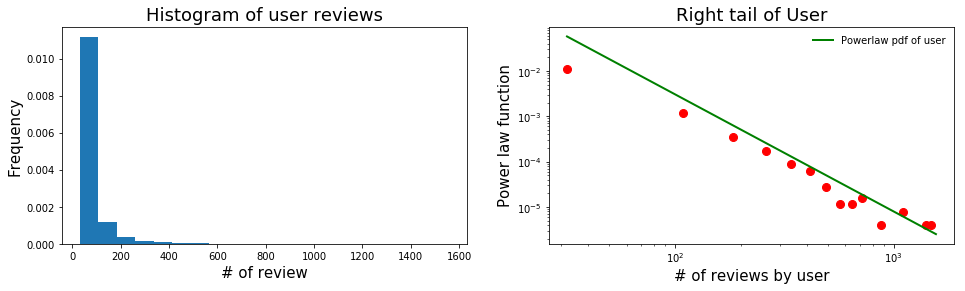

Mean of bootstrap:1.586
Right tail interval at 0.90 CL: [1.557, 1.620]


In [529]:
##### USER 

p = 0.01 #Defining tails as top p% of returns (both positive and negative)
bts = 0.8 # Fraction of data to be ratined in each bootsrap sample
Nbts = 1500 # Number of bootstrap samples
alpha = 0.9 # Significance level

NV_userid = np.sort(NV_userid)
user_tail = NV_userid [int(np.round((1-p)*len(NV_userid)))-1:] #Selecting top p% of returns
N = len(user_tail) #Number of returns selected as right tail
alpha_user = N/sum(np.log(user_tail/min(user_tail))) #Maximum-Likelihood estimate for right tail exponent

print("Right tail exponent:{:.3f}".format(alpha_user))

x_tail_user = np.linspace(min(user_tail), max(user_tail), num=100)
# y_tail_user = alpha_bus*(x_tail_user/min(user_tail))**(-alpha_user-1)/min(user_tail) #Power law distribution
y_tail_user = alpha_bus/min(user_tail) *(x_tail_user/min(user_tail))**(-alpha_user-1)

fig = plt.figure(figsize=plt.figaspect(0.25))
ax = fig.add_subplot(1, 2, 1)
b_tail_user, a_tail_user, ptchs_user = ax.hist(user_tail, bins=20, normed= True)
ax.set_xlabel('# of review',fontsize = 15)
ax.set_ylabel('Frequency',fontsize = 15)
ax.set_title("Histogram of user reviews", fontsize=18)

ax = fig.add_subplot(1, 2, 2)
# ax.scatter(x_tail_user,y_tail_user, color = 'g')
ax.loglog(a_tail_user[:-1],b_tail_user, marker='o',linewidth=0, markersize=8,color = 'r')
ax.loglog(x_tail_user, y_tail_user,'g', linewidth=2, label='Powerlaw pdf of user' )
# ax.semilogy(x_tail_user, y_tail_user,linewidth=2,color ='y')
ax.set_title("Right tail of User", fontsize=18)
ax.set_xlabel('# of reviews by user', fontsize = 15)
ax.set_ylabel('Power law function', fontsize = 15)
ax.legend(loc='best', frameon=False)
plt.show()

##Right tail with bootsrap

alpha_user_bts = []

for i in range(Nbts):
    
    r_bts = np.random.permutation(NV_userid) #Random permutation of returns
    r_bts = r_bts[:int(np.round(bts*len(r_bts)))] # Bootstrapping bts of returns
    r_bts = np.sort(r_bts)
    r_right_bts = r_bts[int(np.round((1-p)*len(r_bts))):] #Selecting top p% of returns
    
    N_bts = len(r_right_bts) #Number of bootstrapped returns
    
    alpha_user_bts.append(N_bts/sum(np.log(r_right_bts/min(r_right_bts))))
alpha_user_bts = np.sort(alpha_user_bts)
print("Mean of bootstrap:{:.3f}".format(np.mean(alpha_user_bts)))
user_interval_lower = alpha_user_bts[int(np.round(0.5*(1-alpha)*Nbts))]
user_interval_upper = alpha_user_bts[int(np.round(0.5*(1+alpha)*Nbts))]

# print("Right tail interval at 0.90 CL: " + '[' + str(user_interval_lower) + ', ' + str(user_interval_upper) + ']')
print("Right tail interval at 0.90 CL: [{:.3f}, {:.3f}]".format(user_interval_lower,  user_interval_upper))

In [543]:
NV_userid.shape

(333965,)